In [5]:
from almanac.strategy.strategy25 import Strategy25
from almanac.dynamic_optimization.dyn_opt import greedy_algo_across_integer_values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Strategy 4

Calculating covariance - can take a while


Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              90.0%        58.0%

Cumulative Return           4,150.53%    20.70%
Pre-Cost Cumulative Return  -            25.2%
Active Return               0.0%         -4129.83%
CAGR﹪                      5.01%        0.25%

Post-cost Sharpe            0.48         0.24
Pre-Cost Sharpe             -            0.29
Cost in Sharpe              -            0.05
Prob. Sharpe Ratio          99.98%       96.42%
Smart Sharpe                0.47         0.24
Sortino                     0.68         0.33
Smart Sortino               0.66         0.33
Sortino/√2                  0.48         0.24
Smart Sortino/√2            0.47         0.23
Omega                       1.07         1.07

Max Drawdown                -56.78%      -12

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-10-06  2022-12-28  2022-12-30   451    -12.264446        -12.133939
2  2018-05-30  2020-03-29  2020-12-17   933     -4.939640         -4.343504
3  2017-02-27  2017-06-27  2018-05-20   448     -3.442106         -3.213781
4  2015-11-04  2016-01-10  2016-04-19   168     -3.016556         -2.973432
5  2013-08-21  2014-11-19  2015-10-22   793     -2.930490         -2.848058

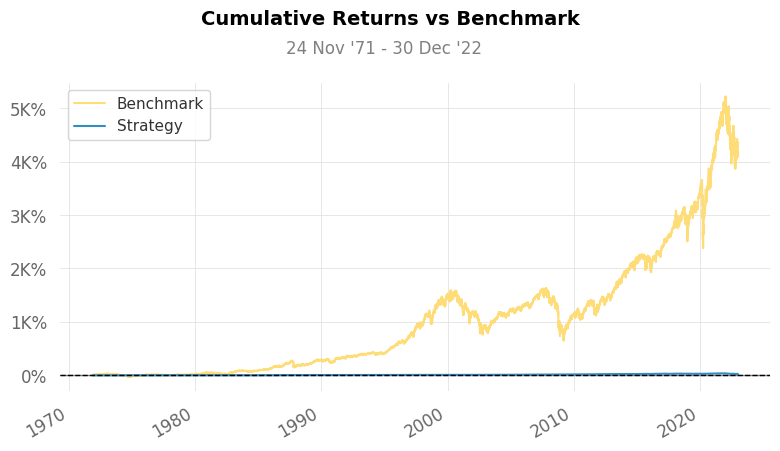

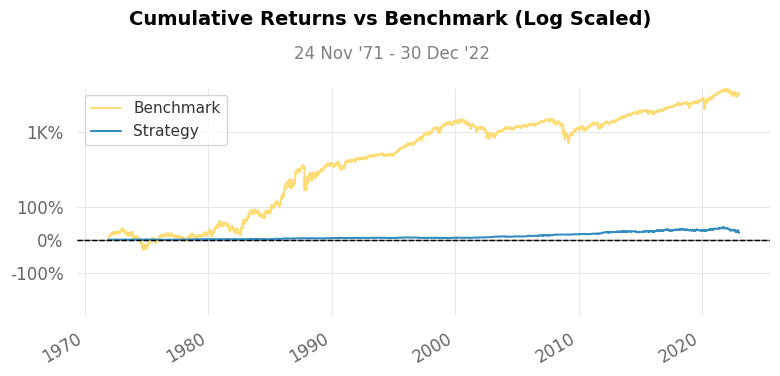

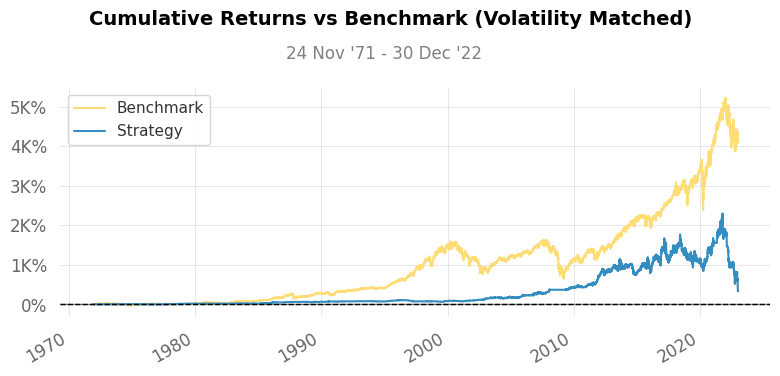

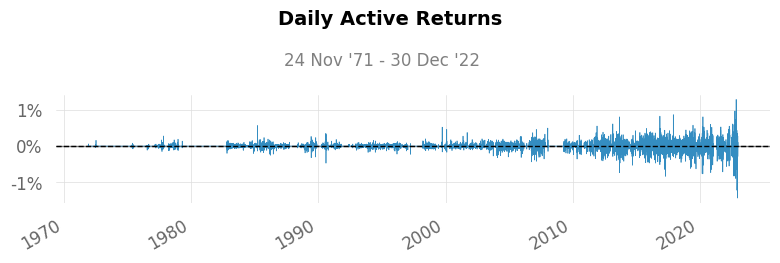

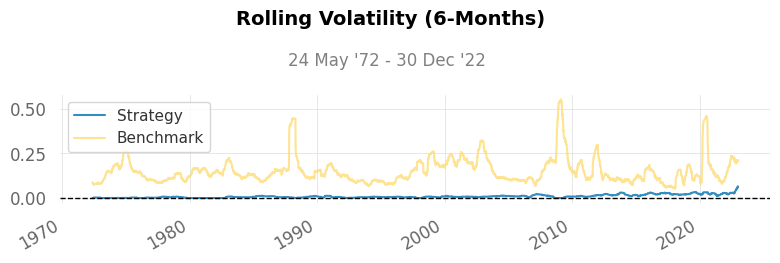

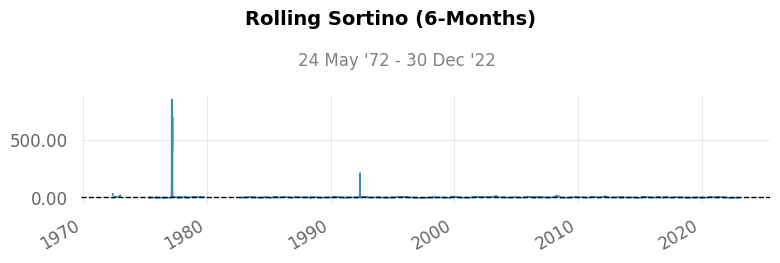

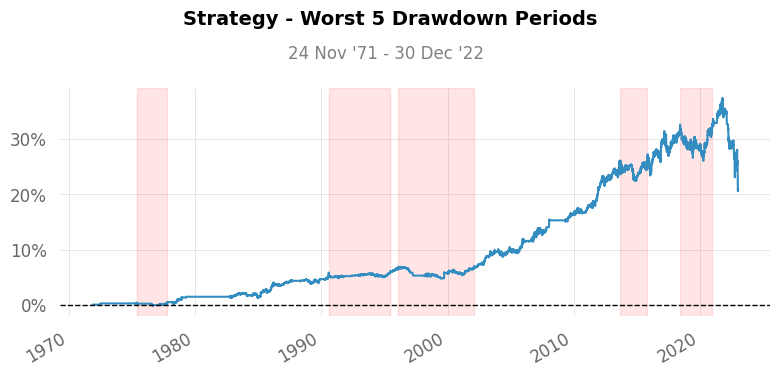

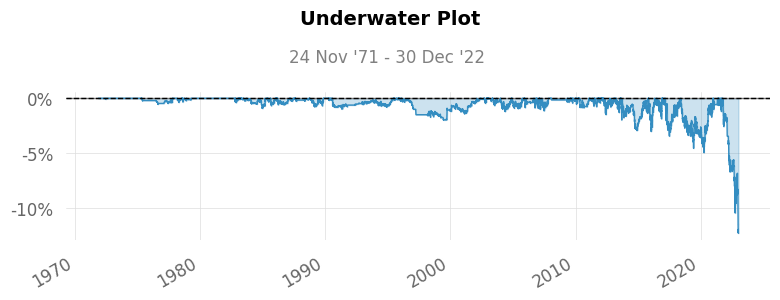

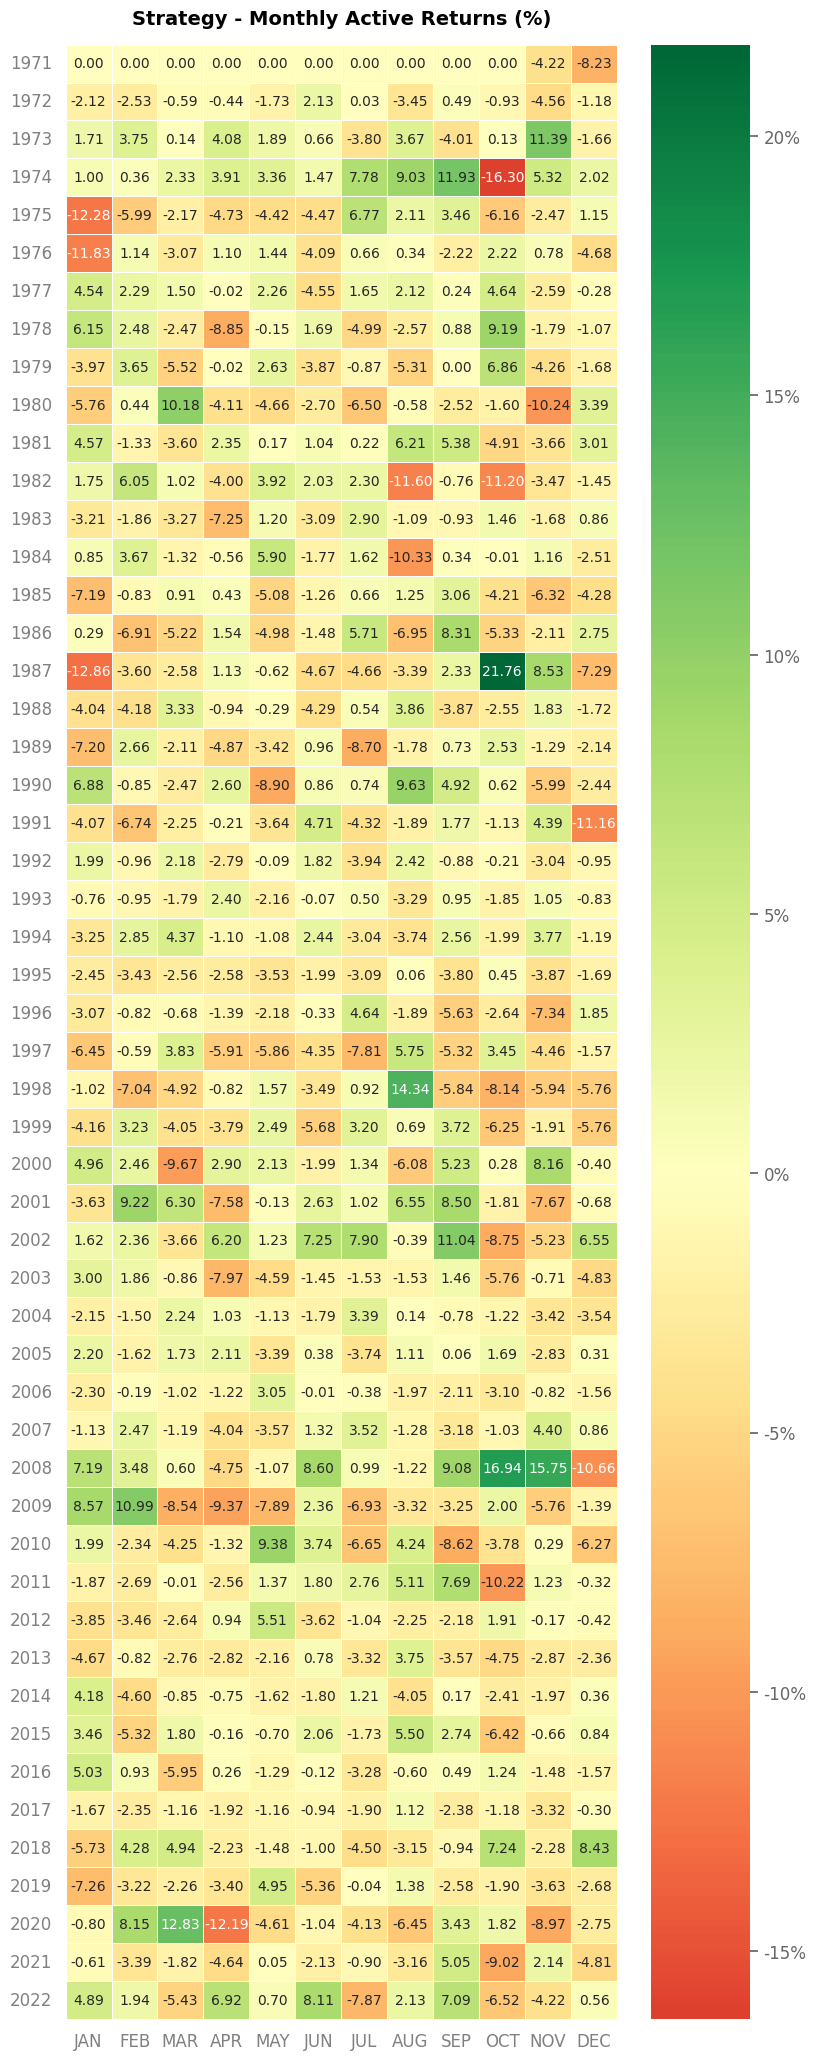

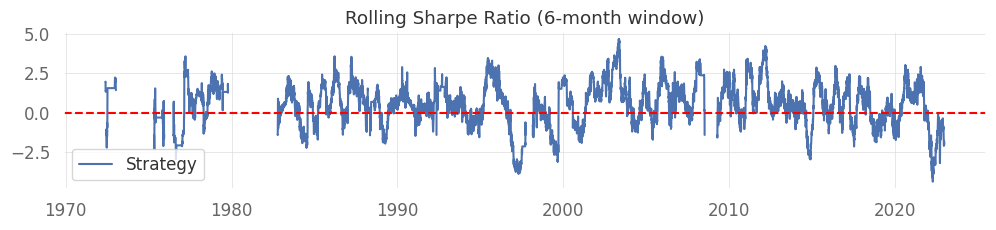

In [32]:
from almanac.strategy.strategy4 import Strategy4
from almanac.config.instruments import (
    INSTRUMENT_LIST,
    instrument_weights,
    multipliers,
    cost_per_contract_dict,
)
capital = 50000
idm = 1.2
risk_target = 0.2

strategy4_instance = Strategy4(
    data_path="../sample_data/jumbo/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    cost_per_contract_dict=cost_per_contract_dict,
    capital=capital,
    use_buffer=False,
    get_carry=False,
)
strat4_positions = strategy4_instance.run_strategy(
    show_stats=False, return_positions=True
)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat4_positions,
)

optimized_positions_str4 = optimizer.run_strategy(return_position=True)

In [33]:
optimized_positions_df_str4 = pd.DataFrame(optimized_positions_str4)
non_zero_mask = (optimized_positions_df_str4 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str4.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 18


Index(['US2', 'US3', 'SHATZ', 'BTP3', 'DOW', 'NASDAQ_micro', 'SP500_micro',
       'NIFTY', 'NIKKEI400', 'MUMMY', 'TOPIX', 'V2X', 'GOLD_micro', 'PALLAD',
       'SILVER', 'BITCOIN', 'GAS_US_mini', 'BBCOMM'],
      dtype='object')

### Strategy 5

Calculating covariance - can take a while
Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              80.0%        34.0%

Cumulative Return           3,982.84%    9.74%
Pre-Cost Cumulative Return  -            11.42%
Active Return               0.0%         -3973.1%
CAGR﹪                      4.96%        0.12%

Post-cost Sharpe            0.49         0.17
Pre-Cost Sharpe             -            0.2
Cost in Sharpe              -            0.03
Prob. Sharpe Ratio          99.99%       90.55%
Smart Sharpe                0.47         0.17
Sortino                     0.69         0.24
Smart Sortino               0.66         0.23
Sortino/√2                  0.49         0.17
Smart Sortino/√2            0.46         0.17
Omega                       1.07         1.07

Max Drawdown                -56.78%      -4.38

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-05-30  2020-02-03  2020-03-10   651     -4.382038         -3.813955
2  2021-05-10  2022-12-23  2022-12-30   600     -3.132538         -3.123485
3  2014-09-21  2016-12-07  2017-11-02  1139     -2.841061         -2.431321
4  2012-03-27  2013-10-09  2014-01-20   665     -2.236107         -1.926315
5  2020-03-13  2020-07-03  2020-08-17   158     -1.869883         -1.865345

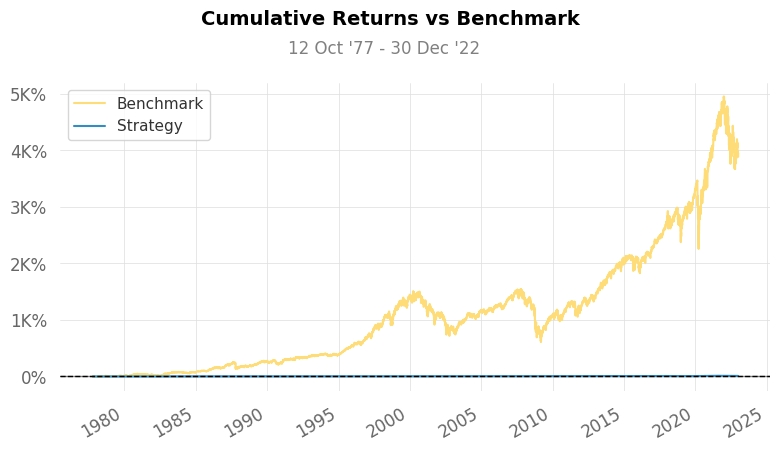

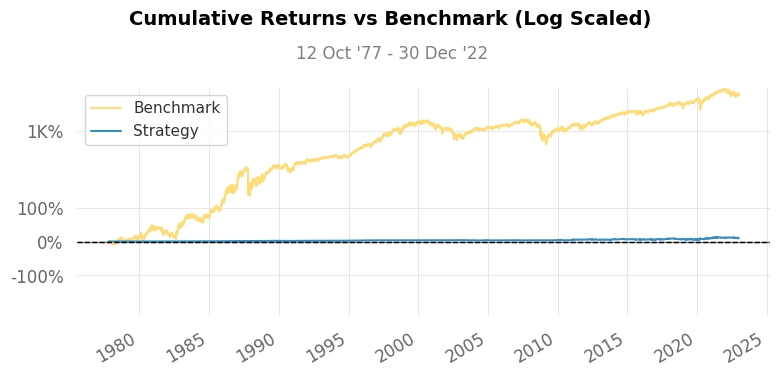

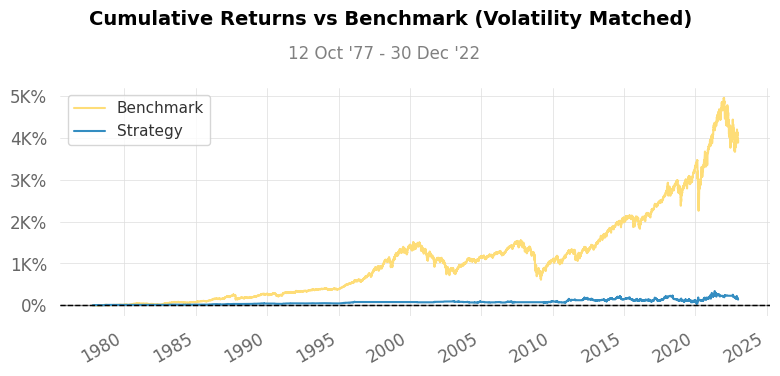

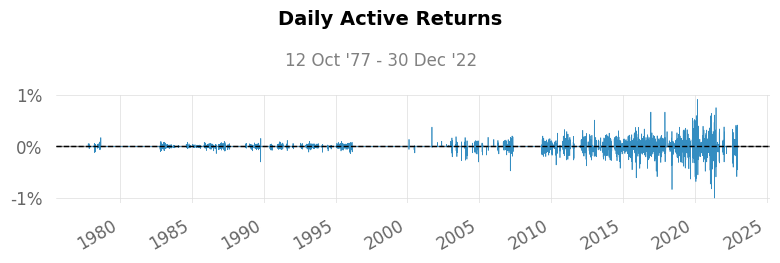

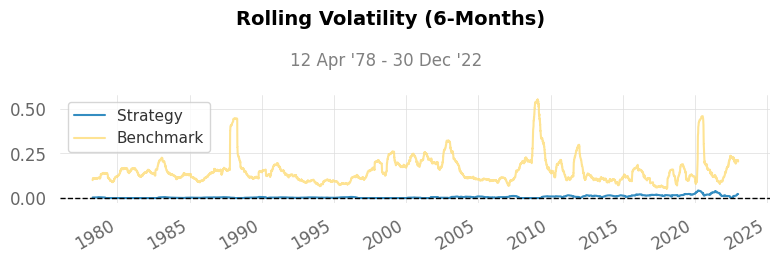

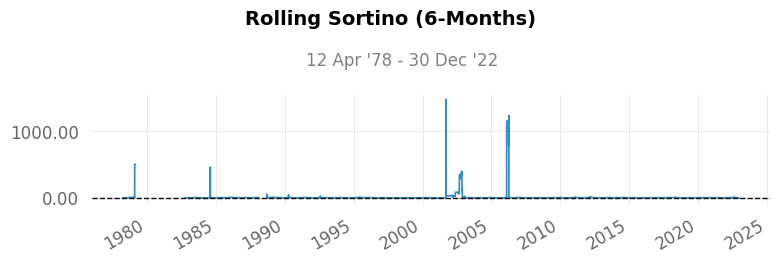

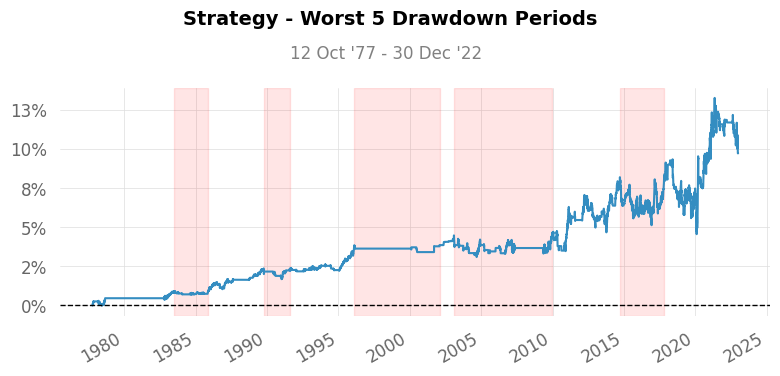

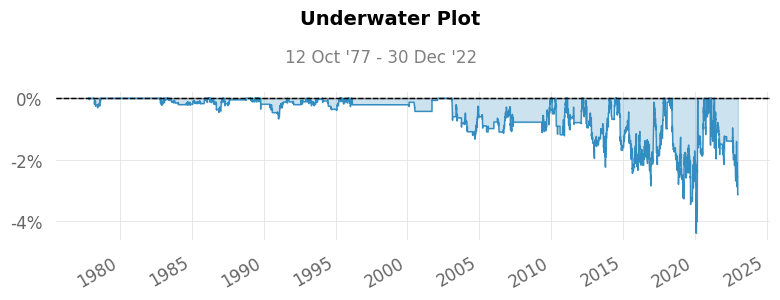

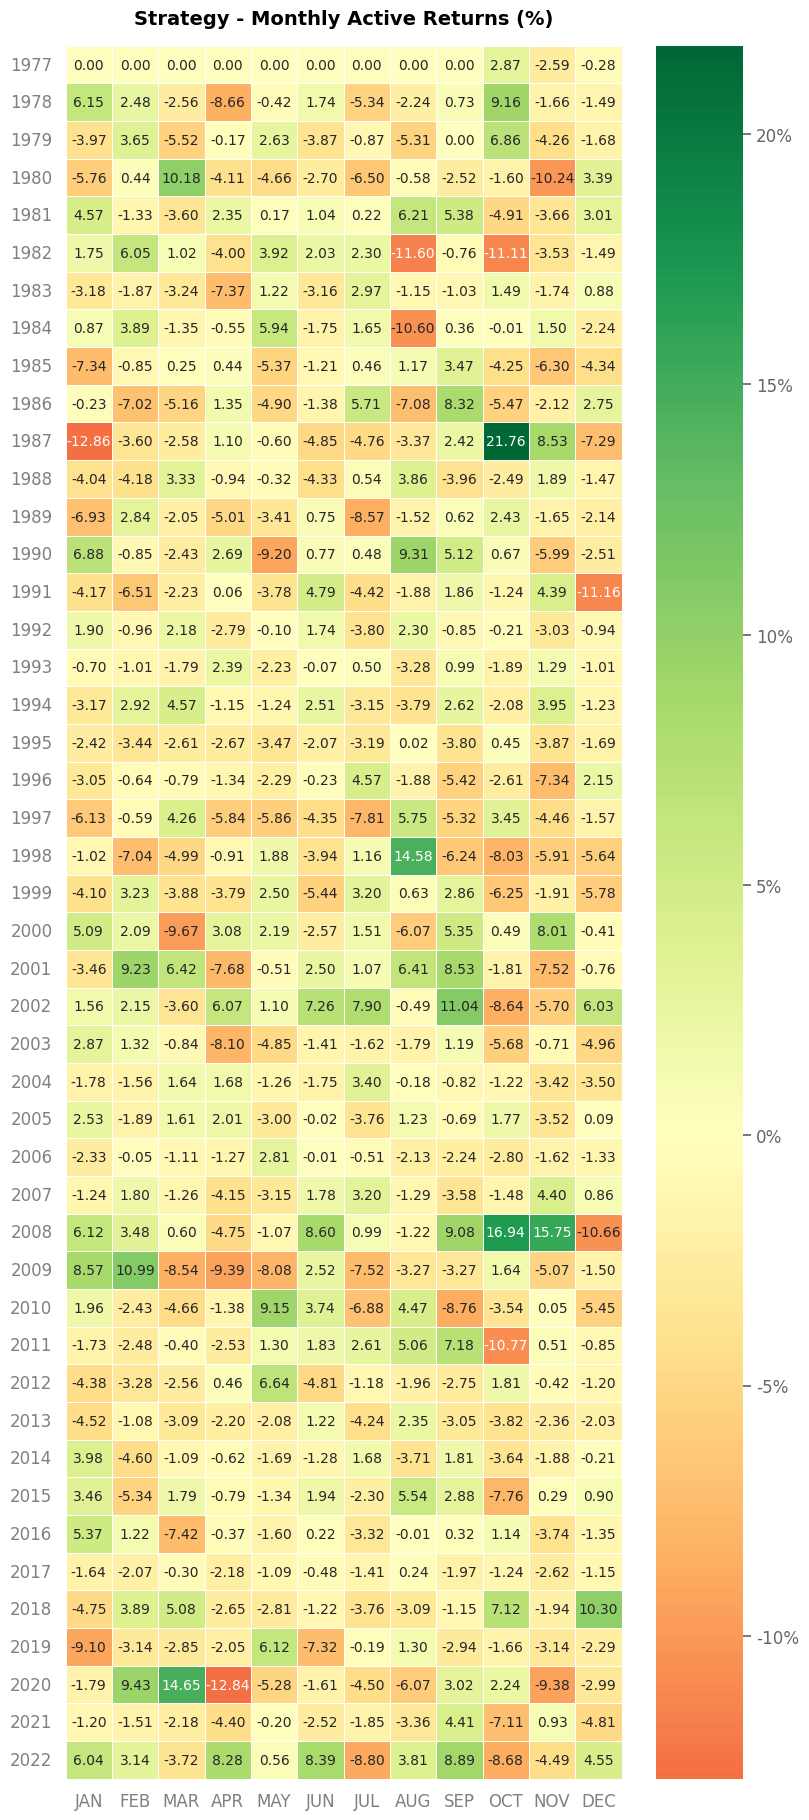

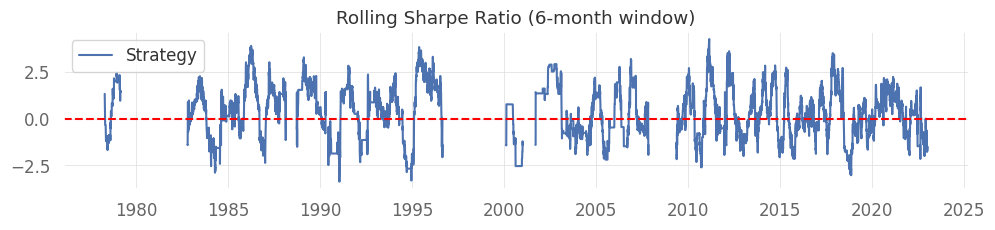

In [36]:
from almanac.strategy.strategy5 import Strategy5
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 50000
idm = 1
risk_target = 0.2

strat = Strategy5(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  use_buffer=False
                  )
strat5_positions = strat.run_strategy(show_stats=False, return_positions=True)
optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat5_positions,
)
optimized_positions_str5 = optimizer.run_strategy(return_position=True)

In [38]:
optimized_positions_df_str5 = pd.DataFrame(optimized_positions_str5)
non_zero_mask = (optimized_positions_df_str5 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str5.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 11


Index(['SHATZ', 'DOW', 'NASDAQ_micro', 'SP500_micro', 'NIFTY', 'NIKKEI400',
       'MUMMY', 'V2X', 'GOLD_micro', 'BITCOIN', 'BBCOMM'],
      dtype='object')

### Strategy 6

Calculating covariance - can take a while
Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              80.0%        45.0%

Cumulative Return           3,721.92%    -9.41%
Pre-Cost Cumulative Return  -            -4.42%
Active Return               0.0%         -3731.33%
CAGR﹪                      4.87%        -0.13%

Post-cost Sharpe            0.48         -0.08
Pre-Cost Sharpe             -            -0.03
Cost in Sharpe              -            0.05
Prob. Sharpe Ratio          99.98%       27.63%
Smart Sharpe                0.47         -0.08
Sortino                     0.68         -0.11
Smart Sortino               0.65         -0.11
Sortino/√2                  0.48         -0.08
Smart Sortino/√2            0.46         -0.08
Omega                       0.97         0.97

Max Drawdown                -56.78%

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  1998-08-31  2020-02-03  2022-12-30  8888    -17.221986        -15.371148
2  1987-03-25  1995-01-20  1996-02-02  3237     -1.515326         -1.423292
3  1985-02-26  1985-09-23  1986-03-10   378     -0.540072         -0.523924
4  1986-07-02  1986-11-18  1987-03-19   261     -0.509229         -0.464419
5  1998-03-19  1998-05-15  1998-07-31   135     -0.378472         -0.362543

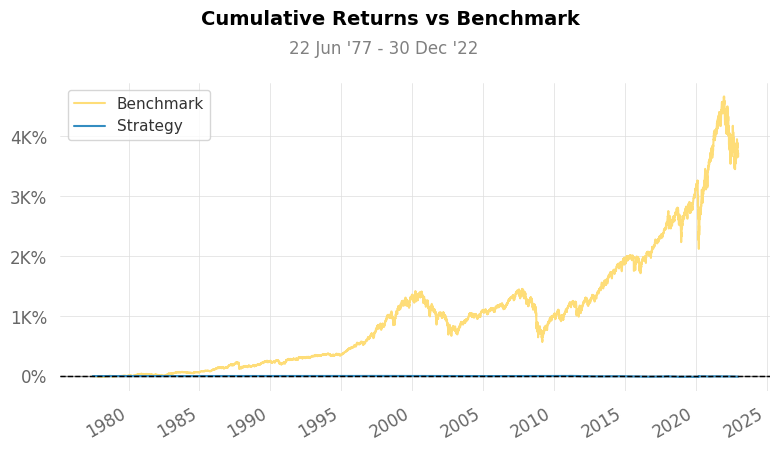

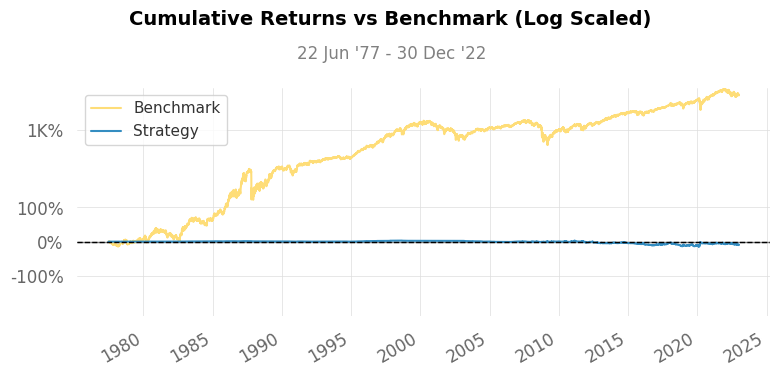

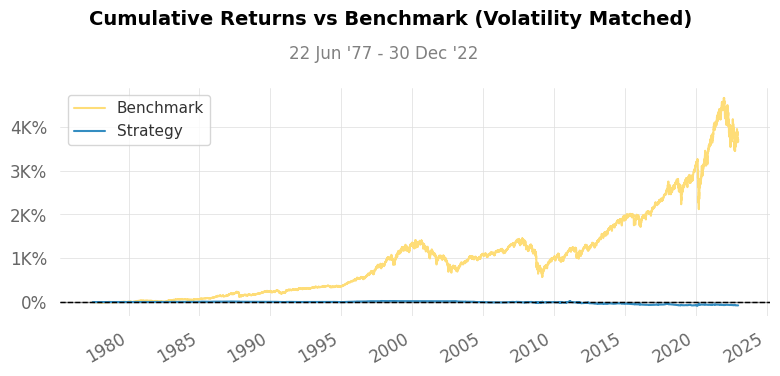

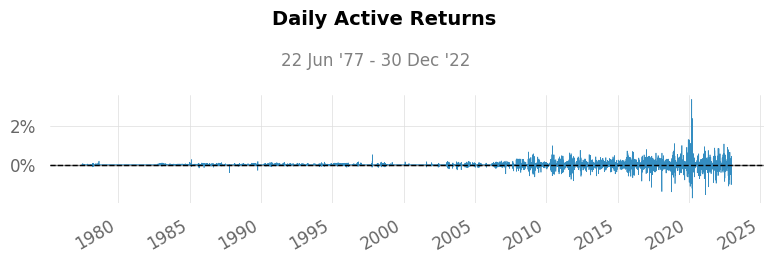

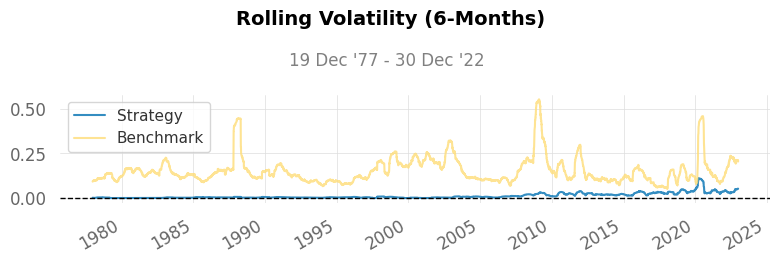

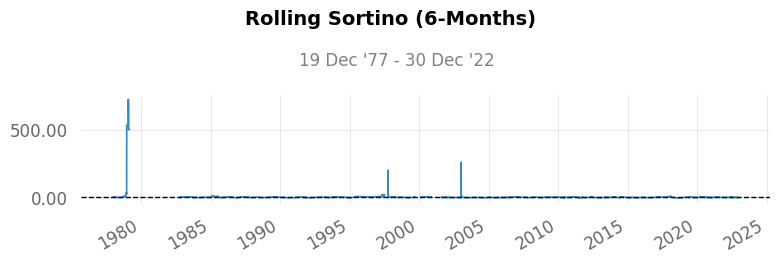

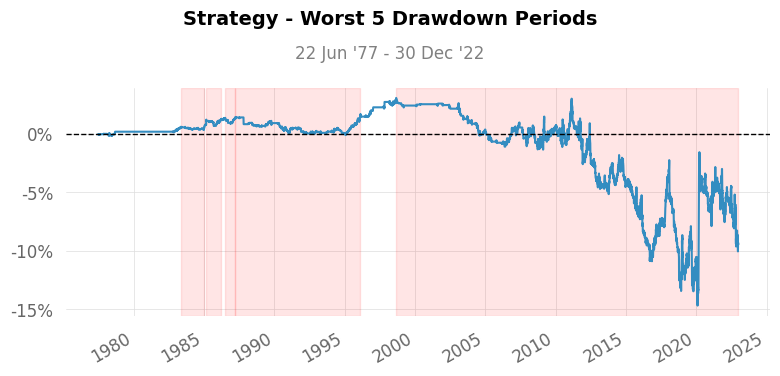

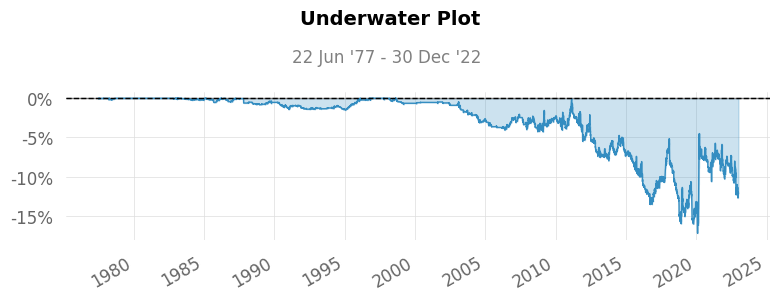

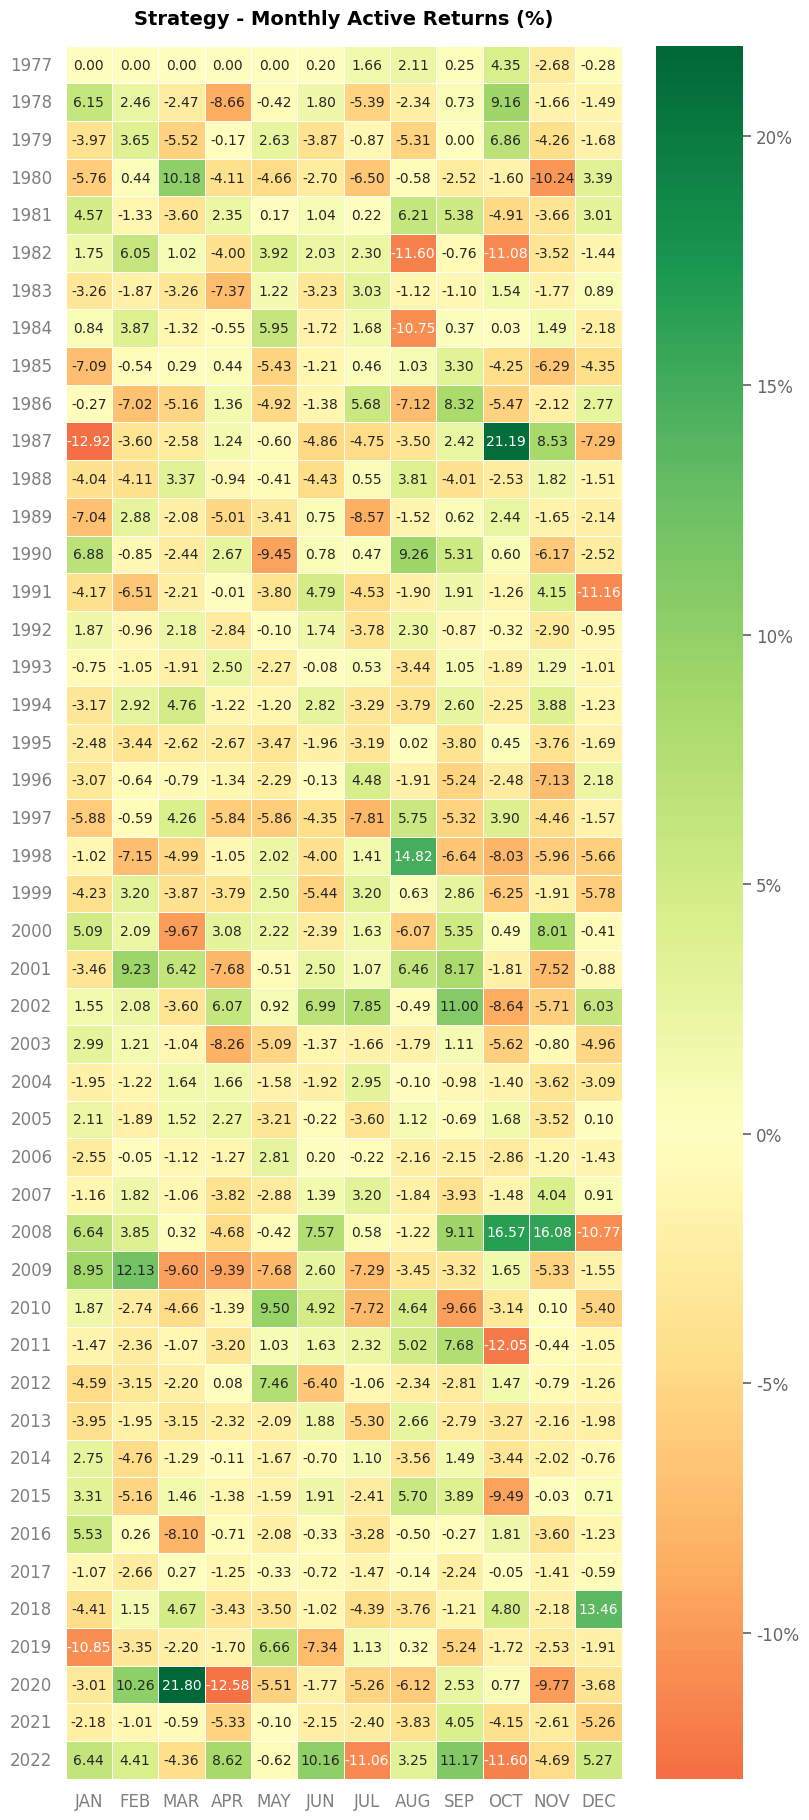

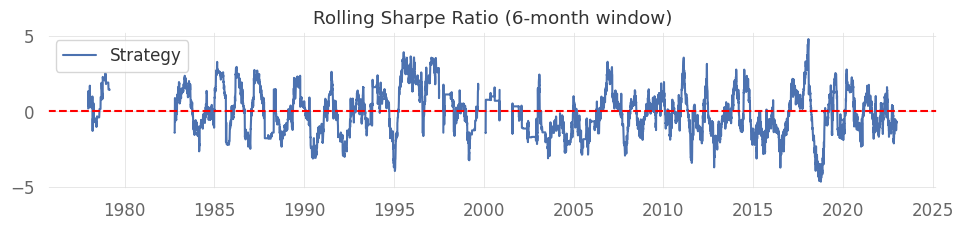

In [40]:
from almanac.strategy.strategy6 import Strategy6
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 50000
idm = 1
risk_target = 0.2

strat = Strategy6(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  get_carry=False
                  )
strat6_positions = strat.run_strategy(show_stats=False, return_positions=True)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat6_positions,
)

optimized_positions_str6 = optimizer.run_strategy(return_position=True)

In [42]:
optimized_positions_df_str6 = pd.DataFrame(optimized_positions_str6)
non_zero_mask = (optimized_positions_df_str6 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str6.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 19


Index(['US2', 'SHATZ', 'DOW', 'NASDAQ_micro', 'SP500_micro', 'DAX',
       'DJSTX-SMALL', 'EU-INSURE', 'FTSECHINAA', 'NIFTY', 'NIKKEI',
       'NIKKEI400', 'MUMMY', 'TOPIX', 'V2X', 'GOLD_micro', 'SILVER', 'BITCOIN',
       'BBCOMM'],
      dtype='object')

### Strategy 7

Calculating covariance - can take a while
Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              90.0%        46.0%

Cumulative Return           3,770.07%    8.70%
Pre-Cost Cumulative Return  -            14.05%
Active Return               0.0%         -3761.37%
CAGR﹪                      4.88%        0.11%

Post-cost Sharpe            0.47         0.08
Pre-Cost Sharpe             -            0.12
Cost in Sharpe              -            0.04
Prob. Sharpe Ratio          99.98%       72.73%
Smart Sharpe                0.45         0.08
Sortino                     0.66         0.11
Smart Sortino               0.64         0.1
Sortino/√2                  0.47         0.08
Smart Sortino/√2            0.45         0.07
Omega                       1.03         1.03

Max Drawdown                -56.78%      -13.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-17  2021-12-20  2022-12-30  1809    -13.178741        -12.811424
2  2009-03-04  2011-11-24  2017-07-19  3060    -12.543793        -12.092159
3  1998-08-31  2009-02-06  2009-03-01  3836     -4.726686         -3.733977
4  2017-08-03  2017-09-08  2017-10-12    71     -3.147310         -3.126563
5  2017-11-08  2017-11-15  2017-12-07    30     -2.228768         -1.465586

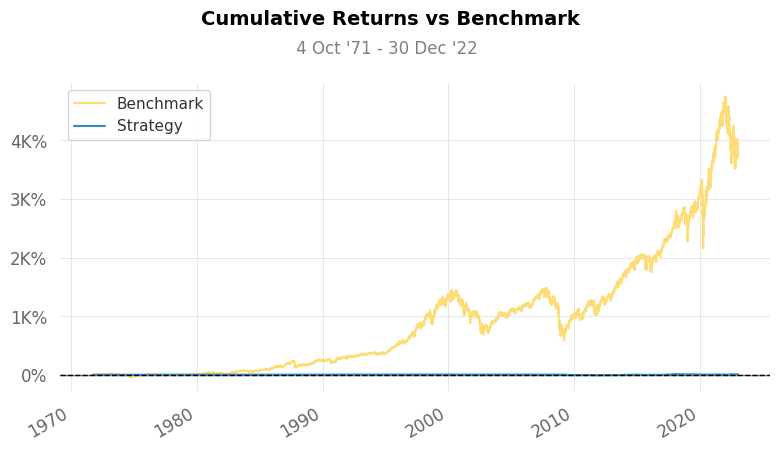

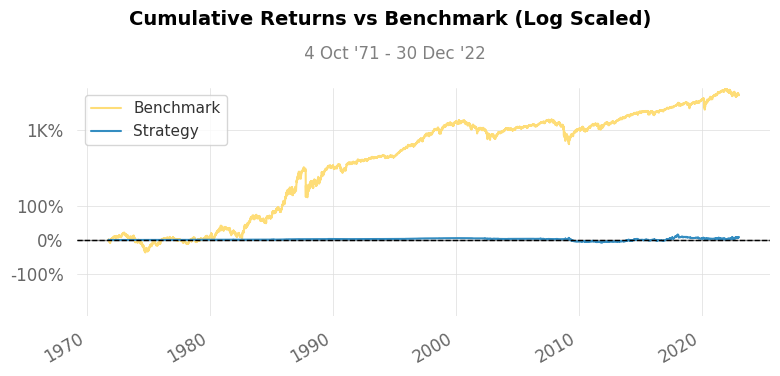

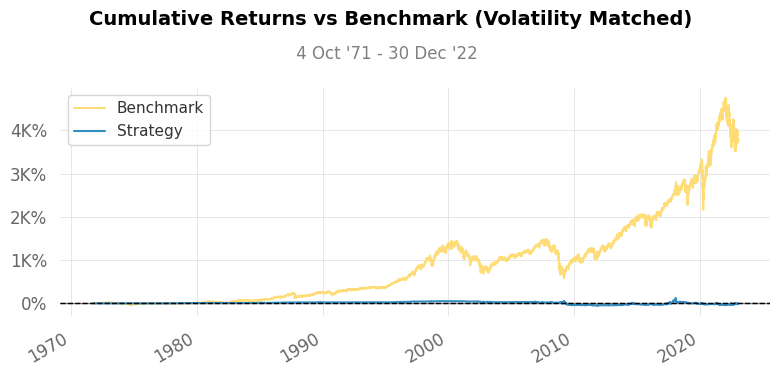

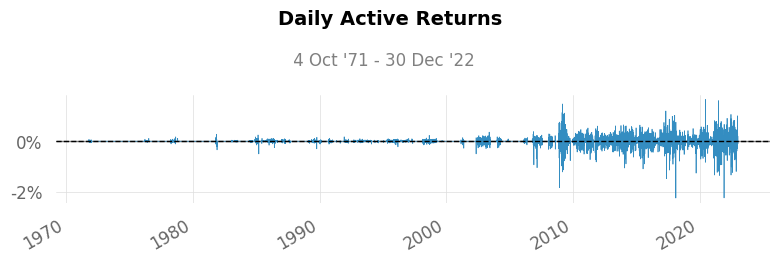

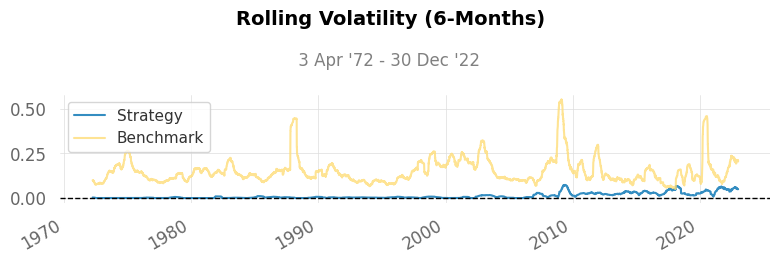

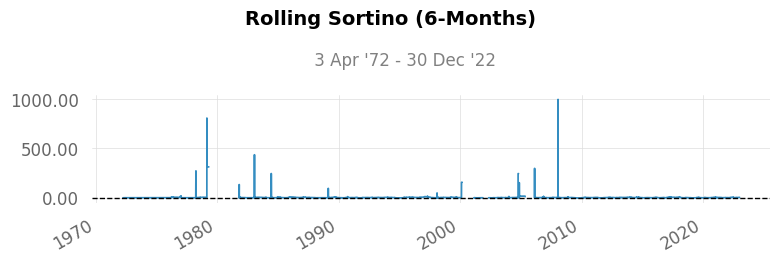

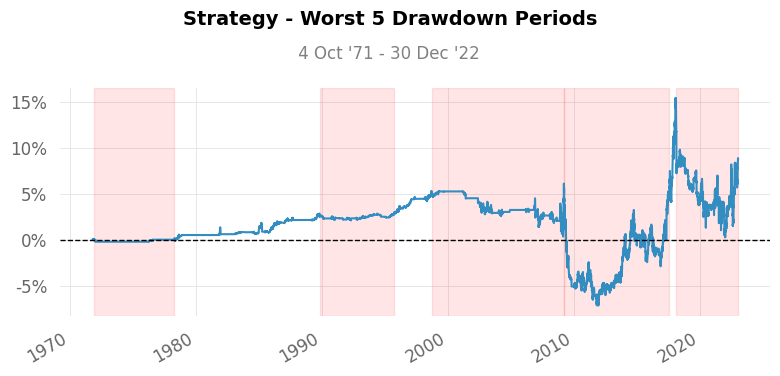

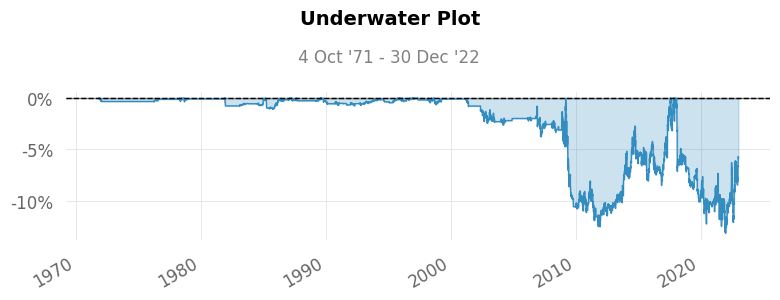

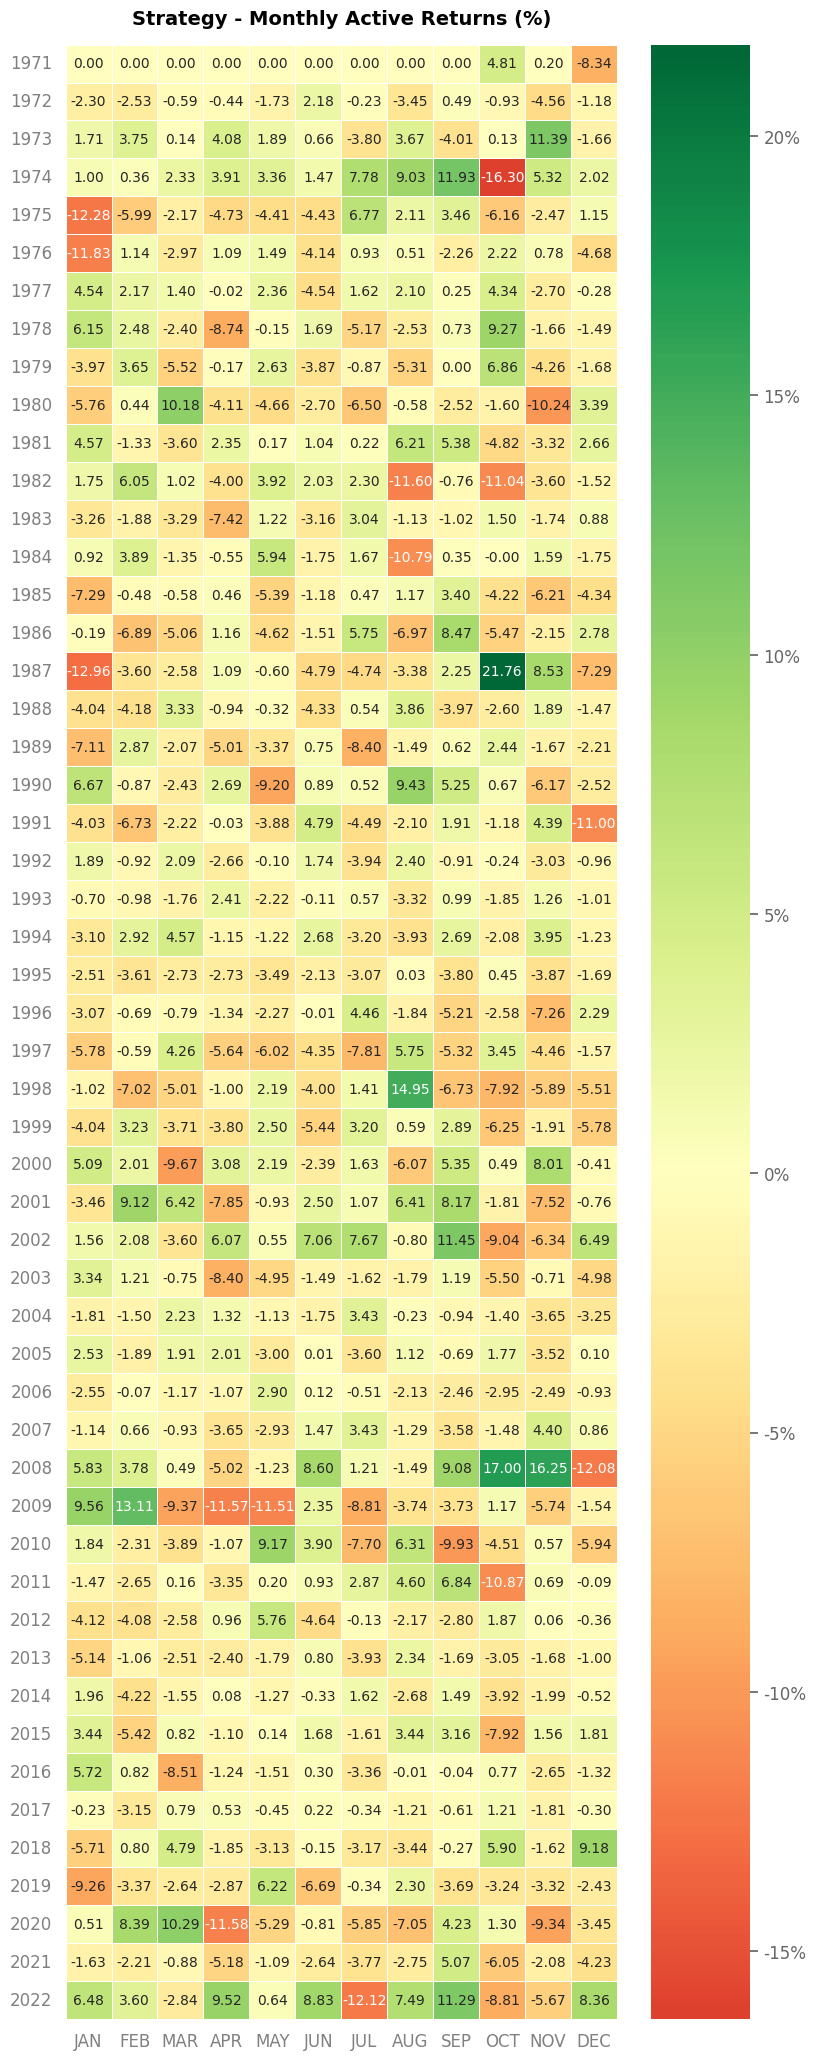

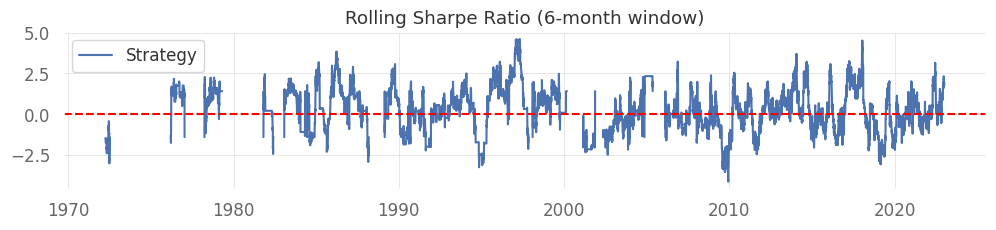

In [44]:
from almanac.strategy.strategy7 import Strategy7
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 50000
idm = 1
risk_target = 0.2

strat = Strategy7(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  get_carry=False
                  )
strat7_positions = strat.run_strategy(show_stats=False, return_positions=True)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat7_positions,
)

optimized_positions_str7 = optimizer.run_strategy(return_position=True)

In [46]:
optimized_positions_df_str7 = pd.DataFrame(optimized_positions_str7)
non_zero_mask = (optimized_positions_df_str7 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str7.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 22


Index(['US2', 'US5', 'SHATZ', 'BTP3', 'DOW', 'NASDAQ_micro', 'SP500_micro',
       'DAX', 'DJSTX-SMALL', 'FTSECHINAA', 'NIFTY', 'NIKKEI', 'NIKKEI400',
       'MUMMY', 'TOPIX', 'VIX', 'V2X', 'GOLD_micro', 'IRON', 'SILVER',
       'BITCOIN', 'BBCOMM'],
      dtype='object')

### Strategy 8

Calculating covariance - can take a while
Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              90.0%        46.0%

Cumulative Return           3,770.07%    8.70%
Pre-Cost Cumulative Return  -            14.05%
Active Return               0.0%         -3761.37%
CAGR﹪                      4.88%        0.11%

Post-cost Sharpe            0.47         0.08
Pre-Cost Sharpe             -            0.12
Cost in Sharpe              -            0.04
Prob. Sharpe Ratio          99.98%       72.73%
Smart Sharpe                0.45         0.08
Sortino                     0.66         0.11
Smart Sortino               0.64         0.1
Sortino/√2                  0.47         0.08
Smart Sortino/√2            0.45         0.07
Omega                       1.03         1.03

Max Drawdown                -56.78%      -13.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-17  2021-12-20  2022-12-30  1809    -13.178741        -12.811424
2  2009-03-04  2011-11-24  2017-07-19  3060    -12.543793        -12.092159
3  1998-08-31  2009-02-06  2009-03-01  3836     -4.726686         -3.733977
4  2017-08-03  2017-09-08  2017-10-12    71     -3.147310         -3.126563
5  2017-11-08  2017-11-15  2017-12-07    30     -2.228768         -1.465586

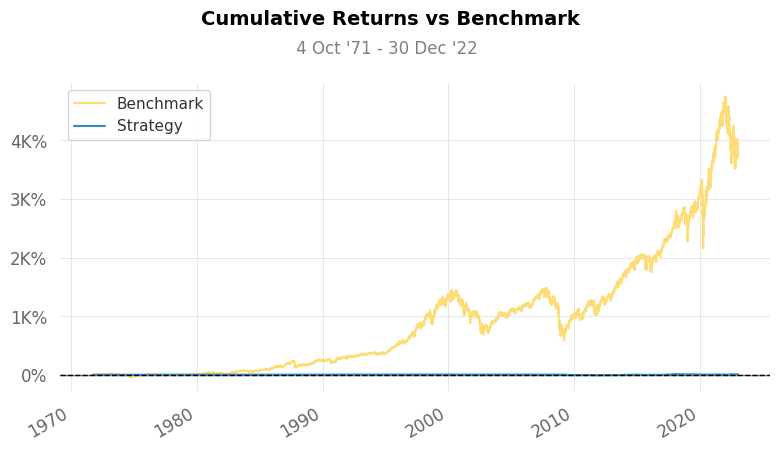

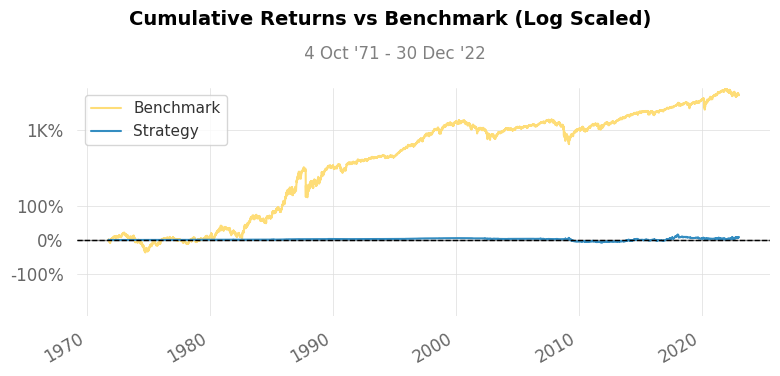

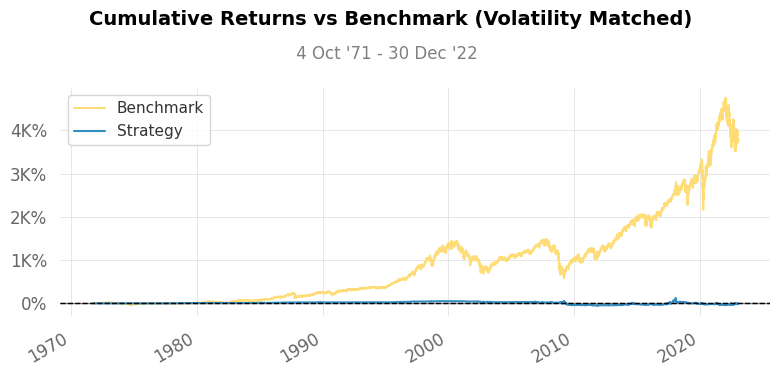

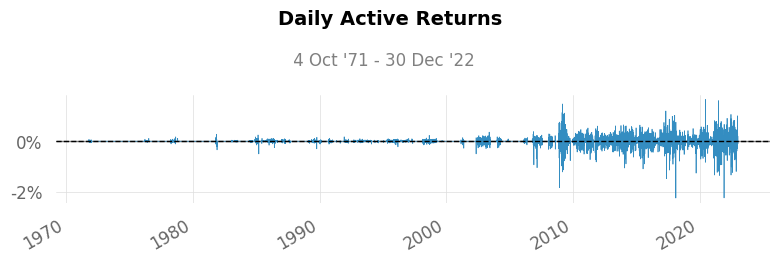

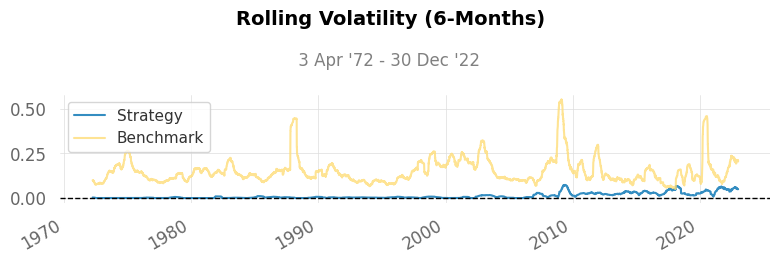

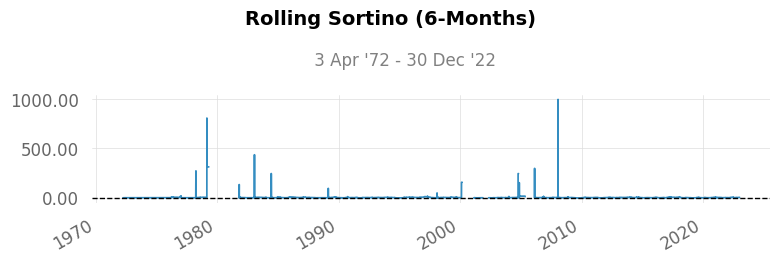

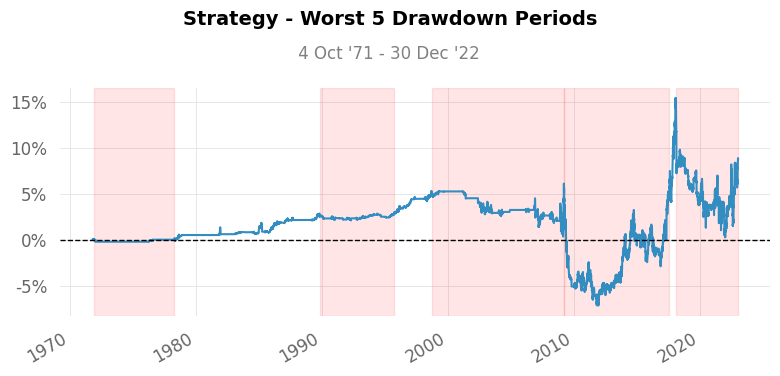

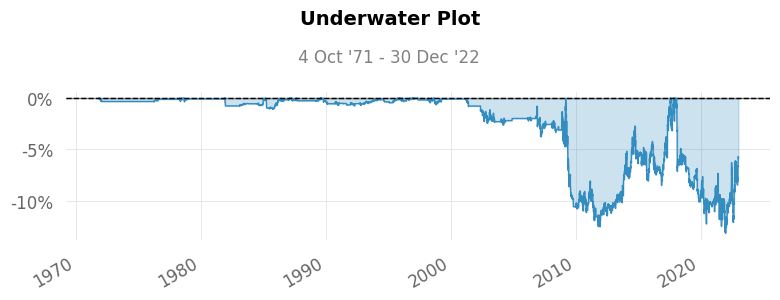

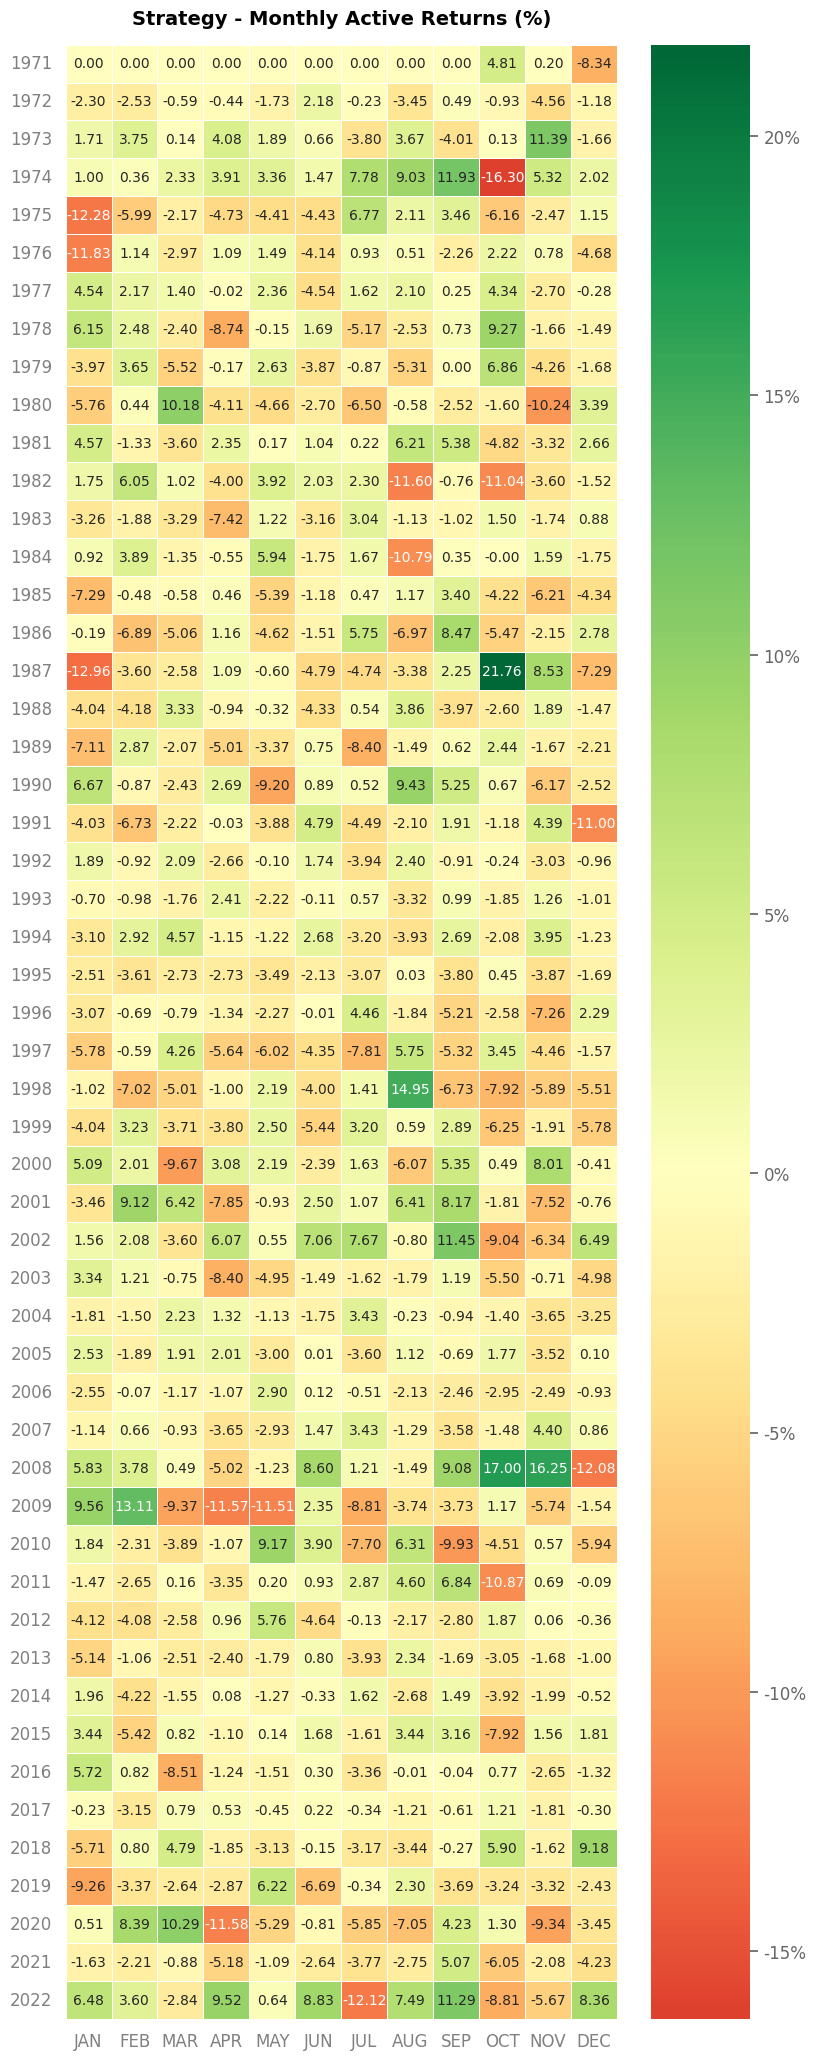

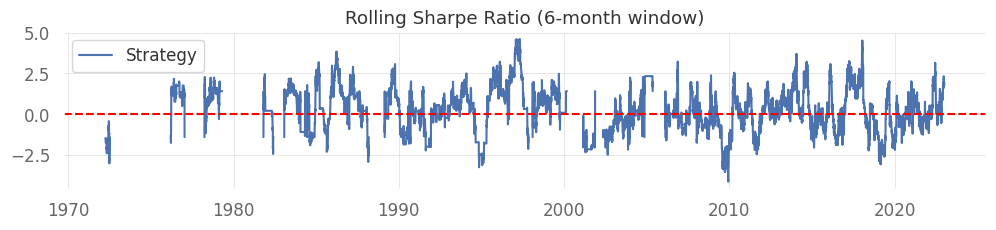

In [47]:
from almanac.strategy.strategy8 import Strategy8
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 50000
idm = 1
risk_target = 0.2

strat = Strategy8(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  get_carry=False
                  )
strat8_positions = strat.run_strategy(show_stats=False, return_positions=True)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat8_positions,
)

optimized_positions_str8 = optimizer.run_strategy(return_position=True)

In [49]:
optimized_positions_df_str8 = pd.DataFrame(optimized_positions_str8)
non_zero_mask = (optimized_positions_df_str8 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str8.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 22


Index(['US2', 'US5', 'SHATZ', 'BTP3', 'DOW', 'NASDAQ_micro', 'SP500_micro',
       'DAX', 'DJSTX-SMALL', 'FTSECHINAA', 'NIFTY', 'NIKKEI', 'NIKKEI400',
       'MUMMY', 'TOPIX', 'VIX', 'V2X', 'GOLD_micro', 'IRON', 'SILVER',
       'BITCOIN', 'BBCOMM'],
      dtype='object')